In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as ppf
import warnings##忽略警告
warnings.filterwarnings('ignore')
%matplotlib inline
plt.style.use('ggplot')

In [2]:
train = pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


## install pandas profiling

```bash
(base) zhangshiqiu:jupyter $ conda install -c conda-forge pandas-profiling
```

In [5]:
# ppf.ProfileReport(train) # explore data analysis

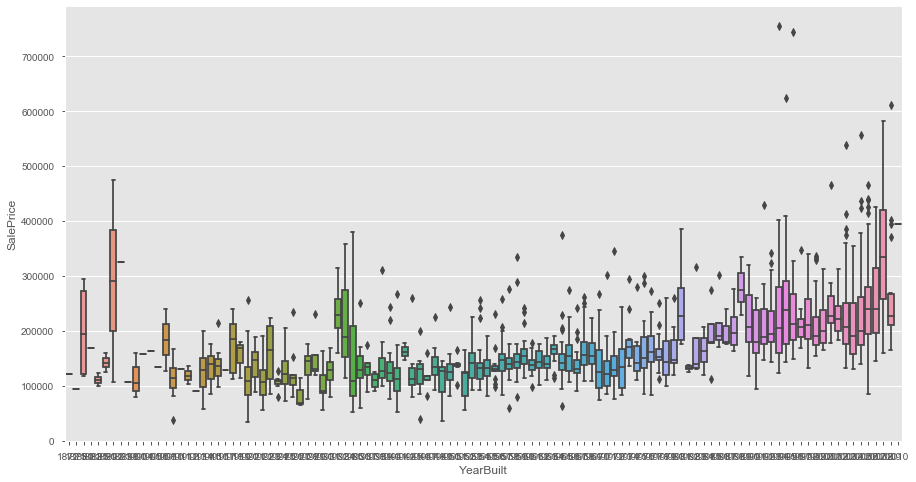

In [6]:
plt.figure(figsize=(15,8))
sns.boxplot(train.YearBuilt, train.SalePrice) # 箱型图查看异常值

Text(0, 0.5, 'SalePrice')

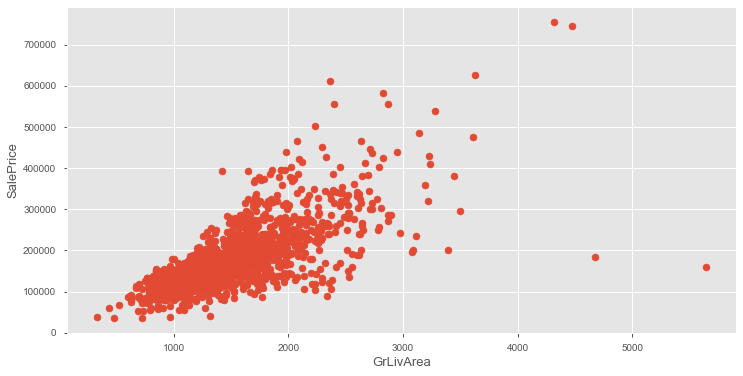

In [7]:
# 散点图用于观察 是否存在 线性关系
plt.figure(figsize=(12,6))
plt.scatter(x=train.GrLivArea, y=train.SalePrice)
plt.xlabel("GrLivArea", fontsize=13)
plt.ylabel("SalePrice", fontsize=13)
# plt.ylim(0,800000)
# 图中右下角有两个异常点

In [8]:
outlier = train[(train.GrLivArea > 4000) & (train.SalePrice < 300000)]
train.drop(outlier.index, inplace=True)

In [9]:
full = pd.concat([train, test], ignore_index=True)
full

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,...,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,...,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,...,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008
5,796,566,320,NaN,1,1Fam,TA,No,732.0,0.0,...,WD,0,Pave,5,796.0,AllPub,40,1993,1995,2009
6,1694,0,0,NaN,3,1Fam,TA,Av,1369.0,0.0,...,WD,0,Pave,7,1686.0,AllPub,255,2004,2005,2007
7,1107,983,0,NaN,3,1Fam,TA,Mn,859.0,32.0,...,WD,0,Pave,7,1107.0,AllPub,235,1973,1973,2009
8,1022,752,0,NaN,2,1Fam,TA,No,0.0,0.0,...,WD,0,Pave,8,952.0,AllPub,90,1931,1950,2008
9,1077,0,0,NaN,2,2fmCon,TA,No,851.0,0.0,...,WD,0,Pave,5,991.0,AllPub,0,1939,1950,2008


In [10]:
full.drop("Id", axis=1,inplace=True)

In [11]:
full.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,...,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,...,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,...,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008


In [12]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2917 entries, 0 to 2916
Data columns (total 80 columns):
1stFlrSF         2917 non-null int64
2ndFlrSF         2917 non-null int64
3SsnPorch        2917 non-null int64
Alley            198 non-null object
BedroomAbvGr     2917 non-null int64
BldgType         2917 non-null object
BsmtCond         2835 non-null object
BsmtExposure     2835 non-null object
BsmtFinSF1       2916 non-null float64
BsmtFinSF2       2916 non-null float64
BsmtFinType1     2838 non-null object
BsmtFinType2     2837 non-null object
BsmtFullBath     2915 non-null float64
BsmtHalfBath     2915 non-null float64
BsmtQual         2836 non-null object
BsmtUnfSF        2916 non-null float64
CentralAir       2917 non-null object
Condition1       2917 non-null object
Condition2       2917 non-null object
Electrical       2916 non-null object
EnclosedPorch    2917 non-null int64
ExterCond        2917 non-null object
ExterQual        2917 non-null object
Exterior1st      291

## 数据清洗

In [13]:
# 查看缺失值
miss = full.isnull().sum()
miss = miss[miss > 0].sort_values(ascending=False)

对字符型空值进行填充

In [14]:
cols_with_nan = list(miss.to_dict().keys())
str_cols = [c for c in cols_with_nan if full[c].dtypes == object]
for col in str_cols:
    full[col].fillna("None", inplace=True)

对数值型空值进行填充

In [15]:
cols=["MasVnrArea", "BsmtUnfSF", "TotalBsmtSF", "GarageCars", "BsmtFinSF2", "BsmtFinSF1", "GarageArea"]
for col in cols:
    full[col].fillna(0, inplace=True)

对`LotFrontage`的空值用均值填充

In [16]:
full["LotFrontage"].fillna(np.mean(full.LotFrontage), inplace=True)

对这些列进行众数填充

In [17]:
cols2 = ["MSZoning", "BsmtFullBath", "BsmtHalfBath", "Utilities", "Functional", "Electrical", "KitchenQual", "SaleType","Exterior1st", "Exterior2nd"]
for col in cols2:
    full[col].fillna(full[col].mode()[0], inplace=True)

In [18]:
nan_cols = full.isnull().sum() > 0
full.isnull().sum()[nan_cols]

GarageYrBlt     159
SalePrice      1459
dtype: int64

## 数据预处理--字符变成数值型这是很重要的

In [19]:
full["MSZoning"].mode()

0    RL
dtype: object

In [20]:
full.MSZoning

0            RL
1            RL
2            RL
3            RL
4            RL
5            RL
6            RL
7            RL
8            RM
9            RL
10           RL
11           RL
12           RL
13           RL
14           RL
15           RM
16           RL
17           RL
18           RL
19           RL
20           RL
21           RM
22           RL
23           RM
24           RL
25           RL
26           RL
27           RL
28           RL
29           RM
         ...   
2887         RM
2888         RM
2889    C (all)
2890    C (all)
2891    C (all)
2892         RM
2893         RM
2894         RL
2895         RL
2896         RL
2897         RL
2898         RL
2899         RL
2900         RL
2901         RL
2902       None
2903         RM
2904         RM
2905         RL
2906         RL
2907         RM
2908         RM
2909         RL
2910         RM
2911         RM
2912         RM
2913         RM
2914         RL
2915         RL
2916         RL
Name: MSZoning, Length: 

In [21]:
for col in cols2:
    full[col]=full[col].astype(str)##astype来进行数据转换

In [22]:
from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()

In [23]:
full["Alley"] = lab.fit_transform(full.Alley)
full["PoolQC"] = lab.fit_transform(full.PoolQC)
full["MiscFeature"] = lab.fit_transform(full.MiscFeature)
full["Fence"] = lab.fit_transform(full.Fence)
full["FireplaceQu"] = lab.fit_transform(full.FireplaceQu)
full["GarageQual"] = lab.fit_transform(full.GarageQual)
full["GarageCond"] = lab.fit_transform(full.GarageCond)
full["GarageFinish"] = lab.fit_transform(full.GarageFinish)
full["GarageYrBlt"] = full["GarageYrBlt"].astype(str)
full["GarageYrBlt"] = lab.fit_transform(full.GarageYrBlt)
full["GarageType"] = lab.fit_transform(full.GarageType)
full["BsmtExposure"] = lab.fit_transform(full.BsmtExposure)
full["BsmtCond"] = lab.fit_transform(full.BsmtCond)
full["BsmtQual"] = lab.fit_transform(full.BsmtQual)
full["BsmtFinType2"] = lab.fit_transform(full.BsmtFinType2)
full["BsmtFinType1"] = lab.fit_transform(full.BsmtFinType1)
full["MasVnrType"] = lab.fit_transform(full.MasVnrType)
full["BsmtFinType1"] = lab.fit_transform(full.BsmtFinType1)

In [24]:
full.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,1,3,1Fam,4,3,706.0,0.0,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,1,3,1Fam,4,1,978.0,0.0,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,1,3,1Fam,4,2,486.0,0.0,...,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,1,3,1Fam,1,3,216.0,0.0,...,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,1,4,1Fam,4,0,655.0,0.0,...,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008


In [25]:
full["MSZoning"] = lab.fit_transform(full.MSZoning)
full["BsmtFullBath"] = lab.fit_transform(full.BsmtFullBath)
full["BsmtHalfBath"] = lab.fit_transform(full.BsmtHalfBath)
full["Utilities"] = lab.fit_transform(full.Utilities)
full["Functional"] = lab.fit_transform(full.Functional)
full["Electrical"] = lab.fit_transform(full.Electrical)
full["KitchenQual"] = lab.fit_transform(full.KitchenQual)
full["SaleType"] = lab.fit_transform(full.SaleType)
full["Exterior1st"] = lab.fit_transform(full.Exterior1st)
full["Exterior2nd"] = lab.fit_transform(full.Exterior2nd)

In [26]:
full.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,1,3,1Fam,4,3,706.0,0.0,...,9,0,Pave,8,856.0,0,0,2003,2003,2008
1,1262,0,0,1,3,1Fam,4,1,978.0,0.0,...,9,0,Pave,6,1262.0,0,298,1976,1976,2007
2,920,866,0,1,3,1Fam,4,2,486.0,0.0,...,9,0,Pave,6,920.0,0,0,2001,2002,2008
3,961,756,0,1,3,1Fam,1,3,216.0,0.0,...,9,0,Pave,7,756.0,0,0,1915,1970,2006
4,1145,1053,0,1,4,1Fam,4,0,655.0,0.0,...,9,0,Pave,9,1145.0,0,192,2000,2000,2008


In [27]:
full.drop("SalePrice",axis=1,inplace=True)##删除

In [28]:
full2 = pd.get_dummies(full)##独热编码

In [29]:
full2.shape

(2917, 182)

In [30]:
full2.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,...,RoofStyle_Mansard,RoofStyle_Shed,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Street_Grvl,Street_Pave
0,856,854,0,1,3,4,3,706.0,0.0,2,...,0,0,0,0,0,0,1,0,0,1
1,1262,0,0,1,3,4,1,978.0,0.0,0,...,0,0,0,0,0,0,1,0,0,1
2,920,866,0,1,3,4,2,486.0,0.0,2,...,0,0,0,0,0,0,1,0,0,1
3,961,756,0,1,3,1,3,216.0,0.0,0,...,0,0,1,0,0,0,0,0,0,1
4,1145,1053,0,1,4,4,0,655.0,0.0,2,...,0,0,0,0,0,0,1,0,0,1


## 数据集的预处理--归一化，标准化等

In [31]:
from sklearn.preprocessing import RobustScaler,StandardScaler

In [32]:
n_train = train.shape[0]#行数

#划分数据集
X = full2[:n_train]##相当于取出X
y = train.SalePrice#取出训练集的标签
std = StandardScaler()

X_scaled = std.fit_transform(X)
y  = np.log(y)#训练集的一个数据分布
test_x = full2[n_train:]#1461行取到最后


## 模型的构建

In [33]:
from sklearn.linear_model import LinearRegression#导入模型
model = LinearRegression()
model1 =model.fit(X_scaled,y)

## 模型训练好了后就对test进行预测

In [34]:
predict = model1.predict(test_x)
result = pd.DataFrame({'Id':test.Id, 'SalePrice':predict})
result.to_csv("baseline.csv",index=False)